# Data preprocessing
Cleaning and normalizaton of dataset.

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [111]:
print('\nNull Values in Training \n{}'.format(titanic.isnull().sum()))


print('\nDuplicated values in train {}'.format(titanic.duplicated().sum()))



Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicated values in train 0


In [112]:
print('Embarkation per ports \n{}'.format(titanic['Embarked'].value_counts()))

# since the most common port is Southampton the chances are that the missing one is from there
titanic['Embarked'].fillna(value='S', inplace=True)
titanic['Fare'].fillna(value=titanic.Fare.mean(), inplace=True)

print('Embarkation per ports after filling \n{}'.format(titanic['Embarked'].value_counts()))

Embarkation per ports 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarkation per ports after filling 
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [113]:
# takes the dataset tha contains all the Misses
titanic[titanic["Name"].str.contains('Mrs.', na=False)].head()

mean_age_miss = titanic[titanic["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = titanic[titanic["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = titanic[titanic["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = titanic[titanic["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


In [114]:
def fill_age(name_age):

    name = name_age[0]
    age = name_age[1]

    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

titanic['Age'] = titanic[['Name', 'Age']].apply(fill_age,axis=1)


In [115]:
titanic['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in titanic['Cabin']])


In [116]:
print('Mean Fare of Cabin B {}'.format(titanic[titanic['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(titanic[titanic['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(titanic[titanic['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(titanic[titanic['Cabin']=='E']['Fare'].mean()))

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.1513406779661
Mean Fare of Cabin D 57.24457575757575
Mean Fare of Cabin E 46.02669375


In [117]:
def reasign_cabin(cabin_fare):

    cabin = cabin_fare[0]
    fare = cabin_fare[1]

    if pd.isnull(cabin):
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'E'
        else:
            return 'X'
    else:
        return cabin



In [118]:
titanic['Cabin'] = titanic[['Cabin', 'Fare']].apply(reasign_cabin,axis=1)


print('\nNull Values in Training \n{}'.format(titanic.isnull().sum()))
titanic.head()


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [119]:
categories = {"female": 1, "male": 0}
titanic['Sex']= titanic['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
titanic['Embarked']= titanic['Embarked'].map(categories)


categories = titanic.Cabin.unique()
titanic['Cabin'] = titanic.Cabin.astype("category").cat.codes


In [120]:
X = titanic.drop(['Name','Ticket','PassengerId', 'Survived'], axis=1)
y = titanic['Survived']

In [121]:
X = X.drop(['Parch','Embarked'], axis=1)


In [123]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y,test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


# Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred = clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.8379888268156425


In [ ]:
scaled_train

array([[1.        , 0.        , 0.40939935, ..., 0.01541158, 1.        ,
        0.        ],
       [1.        , 1.        , 0.25860769, ..., 0.01512699, 1.        ,
        1.        ],
       [0.5       , 0.        , 0.30887158, ..., 0.02537431, 0.57142857,
        0.        ],
       ...,
       [1.        , 0.        , 0.37170143, ..., 0.01411046, 1.        ,
        0.5       ],
       [1.        , 0.        , 0.40939935, ..., 0.01541158, 1.        ,
        0.        ],
       [0.        , 1.        , 0.37170143, ..., 0.20772777, 1.        ,
        0.5       ]])

In [ ]:
# Removing less important features
new_train = scaled_train.drop(['Parch','Embarked'], axis=1)
new_test = scaled_test.drop(['Parch','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

   Accuracy: 0.824
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        74
           1       0.81      0.75      0.78        51

    accuracy                           0.82       125
   macro avg       0.82      0.81      0.82       125
weighted avg       0.82      0.82      0.82       125



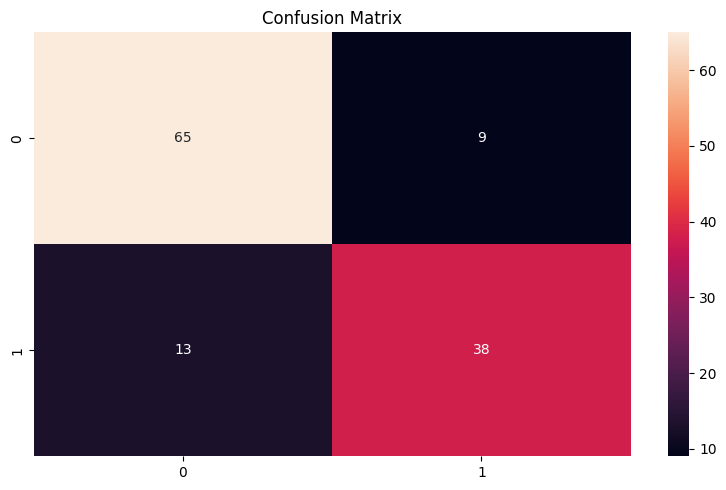

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [ ]:
prediction = clf.predict(new_test)

titanic['Survival_Predictions'] = pd.Series(prediction)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Predictions
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf= AdaBoostClassifier(random_state=0)
clf.fit(X_train,y_train).score(X_test, y_test)

0.770949720670391

In [ ]:
y_pred = clf.predict(X_test)
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

   Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
params= {'n_estimators': [50,100,200,300,400,500,800,100],
         'learning_rate': [1.0,0.1,0.01,0.001]}

rand_search= RandomizedSearchCV(AdaBoostClassifier(random_state=0), params, scoring='accuracy', random_state=0, cv=5)
rand_search.fit(X_train, y_train)

rand_params= rand_search.best_params_
print(rand_params, '\n')
print('Train acc: ', rand_search.best_score_)
preds= rand_search.predict(X_test)
print("test acc:", accuracy_score(preds, y_test))

{'n_estimators': 800, 'learning_rate': 0.01} 

Train acc:  0.8104107160445189
test acc: 0.7932960893854749


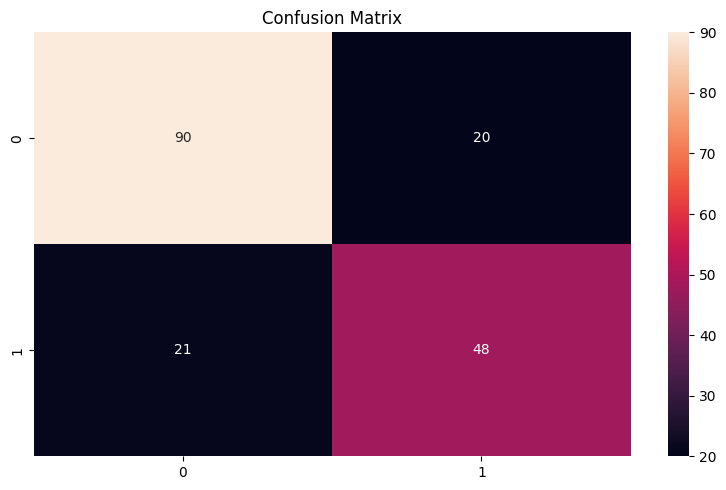

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# SVC classification

In [130]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=0)
model.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
model.score(X_test, y_test)

0.7932960893854749

In [ ]:
model = SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7877094972067039

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='rbf', probability=True, random_state=0)

param_grid = {
    'C': [1, 2, 3],
    'gamma': [0.25, 0.5, 0.75]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................................C=1, gamma=0.25; total time=   0.3s
[CV] END ....................................C=1, gamma=0.25; total time=   0.3s
[CV] END ....................................C=1, gamma=0.25; total time=   0.3s
[CV] END ....................................C=1, gamma=0.25; total time=   0.3s
[CV] END ....................................C=1, gamma=0.25; total time=   0.3s
[CV] END .....................................C=1, gamma=0.5; total time=   0.3s
[CV] END .....................................C=1, gamma=0.5; total time=   0.3s
[CV] END .....................................C=1, gamma=0.5; total time=   0.3s
[CV] END .....................................C=1, gamma=0.5; total time=   0.3s
[CV] END .....................................C=1, gamma=0.5; total time=   0.3s
[CV] END ....................................C=1, gamma=0.75; total time=   0.3s
[CV] END ....................................C=1,

In [ ]:
#cross validation score
from sklearn.model_selection import cross_validate

scores = cross_validate(best_model, X, y, cv=5)
print(scores['test_score'].mean())

0.6992655828259368


In [ ]:
model = best_model

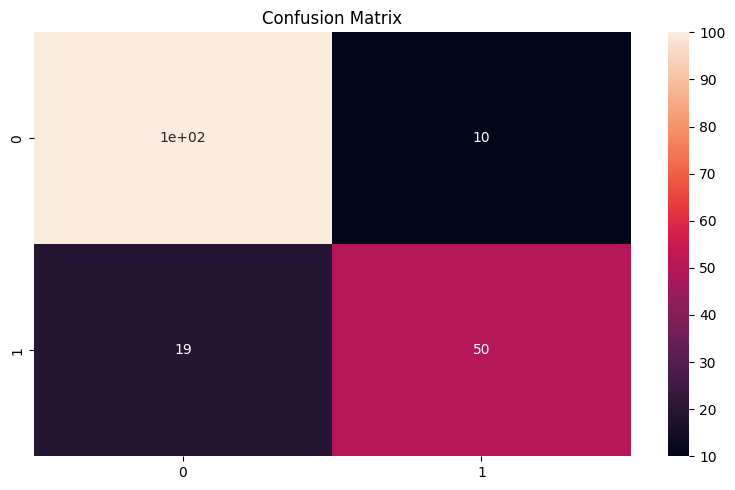

In [128]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()